# Практическая работа №5: Элементы регрессионного анализа. Выборочные прямые среднеквадратической регрессии. Корреляционные отношения
Выполнили студенты гр. 0381 Котов Дмитрий и Михайлов Виктор. Вариант №8

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

Метод наименьших квадратов (МНК) — метод, основанный на поиске минимума суммы квадратов отклонений значений некоторых функций от заданного множества значений. МНК является одним из основных методов регрессионного анализа и применяется для оценки параметров регрессионных моделей на основе выборочных данных.

$M(X/y)=q_1(y)$

$M(Y/x)=q_2(x)$

Пусть имеется двумерная случайная величина $\{X,Y\}$, где $X$ и $Y$ зависимые случайные величины. Функцию $g(x)$ называют линейной функцией среднеквадратической регрессии $X$ на $Y$.

$g(x) = m\left (\frac{Y}{X}  \right ) = m(Y) + r_{xy}\frac{\sigma_y}{\sigma_x}[x-m(X)]$

В случае, когда известны только выборочные данные – двумерная выборка значений случайных величин $X$ и $Y$, возможно построение только выборочных прямых среднеквадратической регрессии. Уравнения выборочных прямых среднеквадратической регрессии:

$\overline{x_y} = \overline{x_в} + \overline{r_{xy}}\frac{S_x}{S_y}(y -\overline{y_в} )$

$\overline{y_x} = \overline{y_в} + \overline{r_{xy}}\frac{S_y}{S_x}(x -\overline{x_в} )$

Для оценки корреляционной зависимости между случайными величинами в общем, а не только линейной, может быть использовано так называемое корреляционной отношение.

Оценку общей дисперсии $X$ можно представить, как сумму
внутригрупповой и межгрупповой дисперсии:

$D_{общ} = D_{межгр} + D_{внгр}$

Внутригрупповая дисперсия вычисляется, как взвешенная по объемам групп средняя арифметическая групповых дисперсий.

Межгрупповая дисперсия вычисляется, как дисперсия условных (групповых) средних $\overline{x_{y_i}}$ относительно выборочной средней $\overline{x_в}$.

Выборочное корреляционное отношение $X$ и $Y$ определяется в соответствии
с выражением:

$\overline{\eta_{xy}} = \frac{\overline{\sigma_{\overline{y_x}}}}{\overline{\sigma_y}} = \sqrt{\frac{D_{межгр}}{D_{общ}}}$

где $\overline{\sigma_{\overline{y_x}}} = \sqrt{D_{межгр}}$, $\overline{\sigma_y} = \sqrt{D_{общ}}$ – выборочные значения СКВО $\overline{y_x}$ и $Y$ соответственно. Аналогично определяется выборочное корреляционное отношение $X$ к $Y$.

Выборочное уравнение регрессии $Y$ на $X$ параболического вида:

$\overline{y_x} = ax^2+bx+c$

Значения коэффициентов $a$, $b$ и $c$ определим с помощью МНК, что приводит к необходимости решать систему линейных уравнений третьего порядка:

$\left\{\begin{matrix} \left ( \sum_{i=1}^{m} n_{x_i}x_i^4 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i^3 \right )  b + \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  c = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} x_i^2\\ \left ( \sum_{i=1}^{m} n_{x_i}x_i^3 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  b + \left ( \sum_{i=1}^{m} n_{x_i}x_i \right )  c = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} x_i\\ \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i \right )  b + Nc = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} \end{matrix}\right.$

## Постановка задачи

Для заданной двумерной выборки (X,Y) построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
from scipy import stats

### Восстановим результаты практической работы №1 (выборочные данные, которые необходимо обработать) (первая выборка)

In [2]:
data = pd.read_csv("/content/sample.csv")
data = data.sample(n=118, random_state=118)
data = data.sort_index()
data = data.reset_index(drop=True)
data.to_csv("/content/выборка.csv", index=False)

df = pd.read_csv("/content/выборка.csv")

df_nu = df.drop("E", axis=1)

df_nu = df_nu.sort_values(by=["nu"], ignore_index = True)

x = df_nu['nu']
var_series = pd.DataFrame({'nu': x.value_counts().sort_index().index})
var_series # Вариационный ряд

# Интервальный ряд
n=118
k = int(np.floor(1+3.31*np.log10(n))) # количество интервалов
h = int(np.ceil((max(x)-min(x))/k)) # ширина интервала
interval_bounds = [] # границы интервалов
x_min = min(var_series['nu'])
interval_bounds.append(x_min)
for i in range(1, k):
  interval_bounds.append(x_min+h*i)
interval_bounds.append(x_min+k*h)

counts = x.value_counts().sort_index().values # абсолютные частоты
rel_counts = x.value_counts(normalize=True).sort_index().values # относительные частоты

interval_series = pd.concat([var_series, pd.DataFrame({'n_i': counts, 'p_i': rel_counts})], axis=1)
interval_series["interval_i-i+1"] = pd.cut(interval_series["nu"], bins=interval_bounds, right=False)
interval_series = interval_series.groupby(["interval_i-i+1"])[["n_i", "p_i"]].apply(sum).reset_index()
interval_series["avg_i"] = np.array([np.mean([interval_bounds[i], interval_bounds[i+1]], axis=0) for i in range(k)])
interval_series = interval_series[["interval_i-i+1", "avg_i", "n_i", "p_i"]]

# Добавим накопленные частоты
n_cum = [] # накопленные абсолютные частоты
p_cum = [] # накопленные относительные частоты

n_abs, p_abs = interval_series['n_i'], interval_series['p_i']

for i in range(len(n_abs)):
  n_cum.append(sum(n_abs[:i+1]))
  p_cum.append(sum(p_abs[:i+1]))

interval_series['n_cum_i'] = n_cum
interval_series['p_cum_i'] = p_cum

### Статистическая обработка второй выборки в объеме практических работ №1 и №2



In [3]:
data = pd.read_csv("/content/sample.csv")
data = data.sample(n=118, random_state=118)
data = data.sort_index()
data = data.reset_index(drop=True)
data.to_csv("/content/выборка.csv", index=False)

df = pd.read_csv("/content/выборка.csv")

df_E = df.drop("nu", axis=1)

df_E = df_E.sort_values(by=["E"], ignore_index = True)

x_E = df_E['E']
var_series_E = pd.DataFrame({'E': x_E.value_counts().sort_index().index})
var_series_E  # Вариационный ряд

# Интервальный ряд
n=118
k = int(np.floor(1+3.31*np.log10(n))) # количество интервалов
h_E = int(np.ceil((max(x_E)-min(x_E))/k)) # ширина интервала
interval_bounds_E = [] # границы интервалов
x_min_E = min(var_series_E['E'])
interval_bounds_E.append(x_min_E)
for i in range(1, k):
  interval_bounds_E.append(x_min_E+h_E*i)
interval_bounds_E.append(x_min_E+k*h_E)

counts_E = x_E.value_counts().sort_index().values # абсолютные частоты
rel_counts_E = x_E.value_counts(normalize=True).sort_index().values # относительные частоты

interval_series_E = pd.concat([var_series_E, pd.DataFrame({'n_i': counts_E, 'p_i': rel_counts_E})], axis=1)
interval_series_E["interval_i-i+1"] = pd.cut(interval_series_E["E"], bins=interval_bounds_E, right=False)
interval_series_E = interval_series_E.groupby(["interval_i-i+1"])[["n_i", "p_i"]].apply(sum).reset_index()
interval_series_E["avg_i"] = np.array([np.mean([interval_bounds_E[i], interval_bounds_E[i+1]], axis=0) for i in range(k)])
interval_series_E = interval_series_E[["interval_i-i+1", "avg_i", "n_i", "p_i"]]

# Добавим накопленные частоты
n_cum_E = [] # накопленные абсолютные частоты
p_cum_E = [] # накопленные относительные частоты

n_abs_E, p_abs_E = interval_series_E['n_i'], interval_series_E['p_i']

for i in range(len(n_abs_E)):
  n_cum_E.append(sum(n_abs_E[:i+1]))
  p_cum_E.append(sum(p_abs_E[:i+1]))

interval_series_E['n_cum_i'] = n_cum_E
interval_series_E['p_cum_i'] = p_cum_E

# Вычислим условные варианты
C_E = interval_series_E["avg_i"][3]
u_E = [(x-C_E)/h_E for x in interval_series_E["avg_i"]]

# По методу произведений вычислим условные моменты
nu_E = [x*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu2_E = [(x**2)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu3_E = [(x**3)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nu4_E = [(x**4)*y for x,y in zip(u_E, interval_series_E['p_i'])]
nuplus1_4_E = [((x+1)**4)*y for x,y in zip(u_E, interval_series_E['p_i'])]

sum_nu_E = sum(nu_E)
sum_nu2_E = sum(nu2_E)
sum_nu3_E = sum(nu3_E)
sum_nu4_E = sum(nu4_E)
sum_nuplus1_4_E = sum(nuplus1_4_E)

N = 7 # размер выборки

M1_star_E = sum_nu_E/N  # условный эмпирический момент 1-го порядка
M1_E = M1_star_E*h_E + C_E  # эмпирический начальный момент

M2_star_E = sum_nu2_E/N  # условный эмпирический момент 2-го порядка
m2_E = (M2_star_E - (M1_star_E**2))*(h_E**2)  # эмпирический центральный момент 2-го порядка

M3_star_E = sum_nu3_E/N  # условный эмпирический момент 3-го порядка
m3_E = (M3_star_E - 3*M2_star_E*M1_star_E + 2*(M1_star_E**3))*(h_E**3)  # эмпирический центральный момент 3-го порядка

M4_star_E = sum_nu4_E/N  # условный эмпирический момент 4-го порядка
m4_E = (M4_star_E - 4*M3_star_E*M1_star_E + 6*(M1_star_E**2)*M2_star_E - 3*(M1_star_E**4))*(h**4)  # эмпирический центральный момент 3-го порядка

M_E= [M1_star_E, M2_star_E, M3_star_E, M4_star_E]
m_E = [M1_E, m2_E, m3_E, m4_E]

x_mean1_E = sum(interval_series_E["avg_i"]*interval_series_E["n_i"])/len(x_E)  # Выборочное среднее

xjv_E = [(x-x_mean1_E)**2 for x in interval_series_E["avg_i"]]
x_var_E = sum(interval_series_E["p_i"]*xjv_E)/N  # Дисперсия

x_var_fix_E = np.var(x_E, ddof = 1) # исправленная оценка дисперсии

unbaised_msd_E = np.sqrt(np.var(x_E, ddof = 1)) # среднеквадратическое отклонение исправленной дисперсии

baised_msd_E = np.sqrt(np.var(x_E)) # среднеквадратическое отклонение смещённой дисперсии

asym_E = m_E[2]/pow(unbaised_msd_E,3) # асимметрия

kurt_E = m_E[3]/pow(unbaised_msd_E,4) # Эксцес

left_bound_moda_E = 3  #граница интервала, частота которого является  наибольшей
Moda_E = interval_bounds_E[left_bound_moda_E] + (interval_bounds_E[left_bound_moda_E+1] - interval_bounds_E[left_bound_moda_E])*((interval_series_E["n_i"][left_bound_moda_E] - interval_series_E["n_i"][left_bound_moda_E - 1])/(2*interval_series_E["n_i"][left_bound_moda_E] - interval_series_E["n_i"][left_bound_moda_E - 1] - interval_series_E["n_i"][left_bound_moda_E + 1]))

left_bound_median_E = int(len(interval_bounds_E)/2 - 1)
Mediana_E = interval_bounds_E[left_bound_median_E] + (n/2 - interval_series_E["n_cum_i"][left_bound_median_E-1])*(interval_bounds_E[left_bound_median_E+1] - interval_bounds_E[left_bound_median_E])/interval_series_E["n_i"][left_bound_median_E]

CV_E = unbaised_msd_E/x_mean1_E  # коэфф вариации

###1. Отобразим двумерную выборку на графике

Text(0.5, 0, 'Объемный вес nu (г/см^3)')

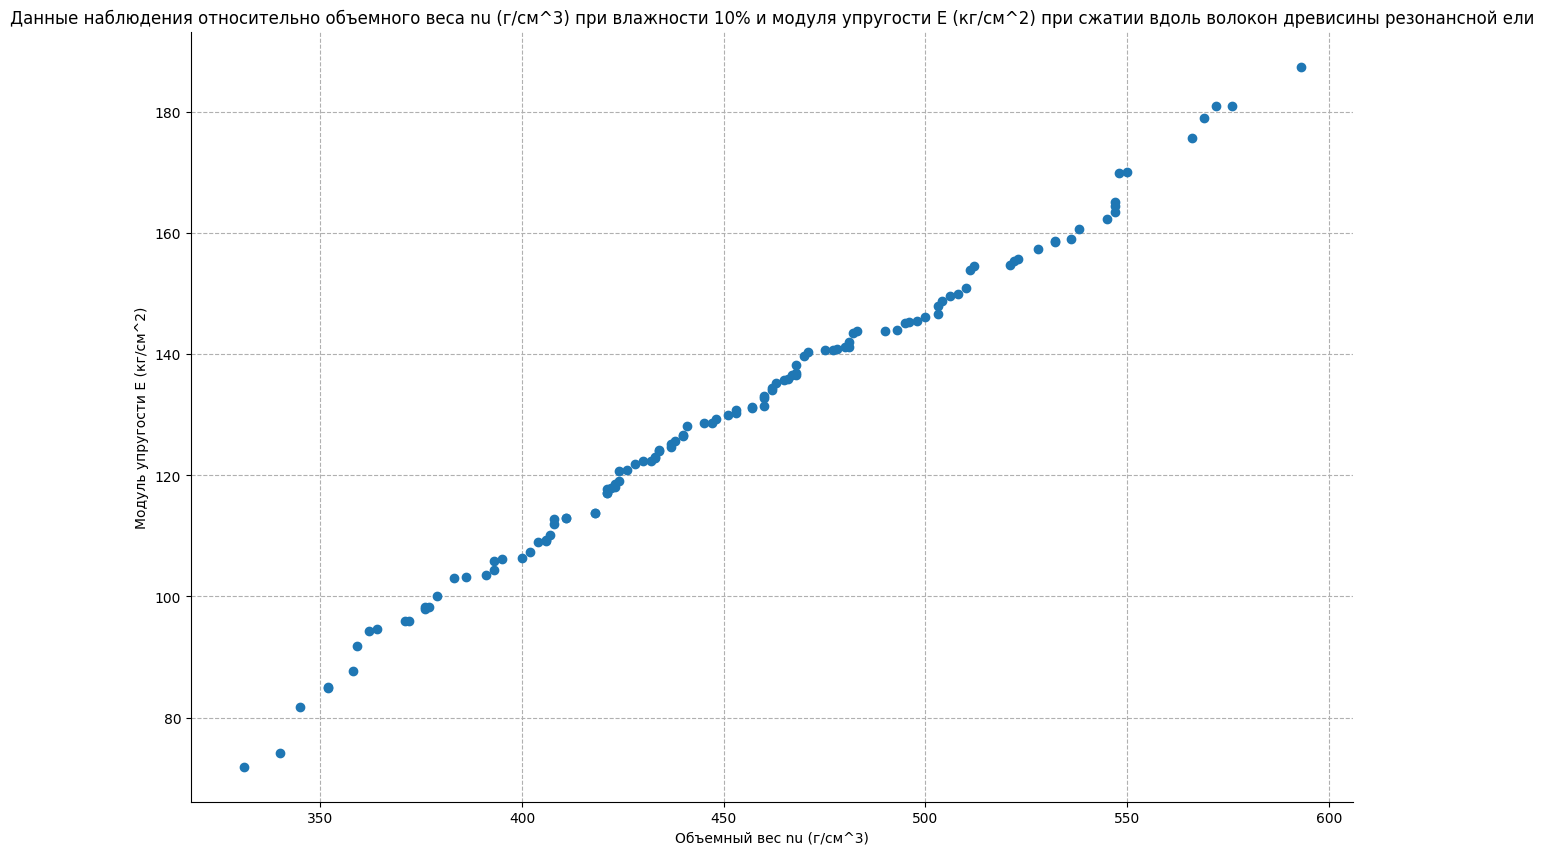

In [4]:
# Plot the figure.
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,x_E)
plt.title('Данные наблюдения относительно объемного веса nu (г/см^3) при влажности 10% и модуля упругости E (кг/см^2) при сжатии вдоль волокон древисины резонансной ели')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.set_ylabel("Модуль упругости E (кг/см^2)")
ax.set_xlabel("Объемный вес nu (г/см^3)")

###2. Для заданной выборки построим уравнения средней квадратичной регрессии x на y и y на x соответственно.

Выборочная прямая средней квадратичной регрессии $X$ на $Y$:

$\overline{x_y} = \overline{x_в} + \overline{r_{xy}}\frac{S_x}{S_y}(y -\overline{y_в} )$

Выборочная прямая средней квадратичной регрессии $Y$ на $X$:

$\overline{y_x} = \overline{y_в} + \overline{r_{xy}}\frac{S_y}{S_x}(x -\overline{x_в} )$

In [5]:
x_mean1 = sum(interval_series["avg_i"]*interval_series["n_i"])/len(x)
unbaised_msd = np.sqrt(np.var(x, ddof = 1))

In [6]:
xv, yv = x_mean1, x_mean1_E
sx, sy = unbaised_msd, unbaised_msd_E
r = 0.9816

In [7]:
regr_xy = lambda y: xv + r*(sx/sy)*(y-yv) # прямая x на y

In [8]:
regr_yx = lambda x: yv + r*(sy/sx)*(x-xv) # прямая y на x

Text(0.5, 0, 'Объемный вес nu (г/см^3)')

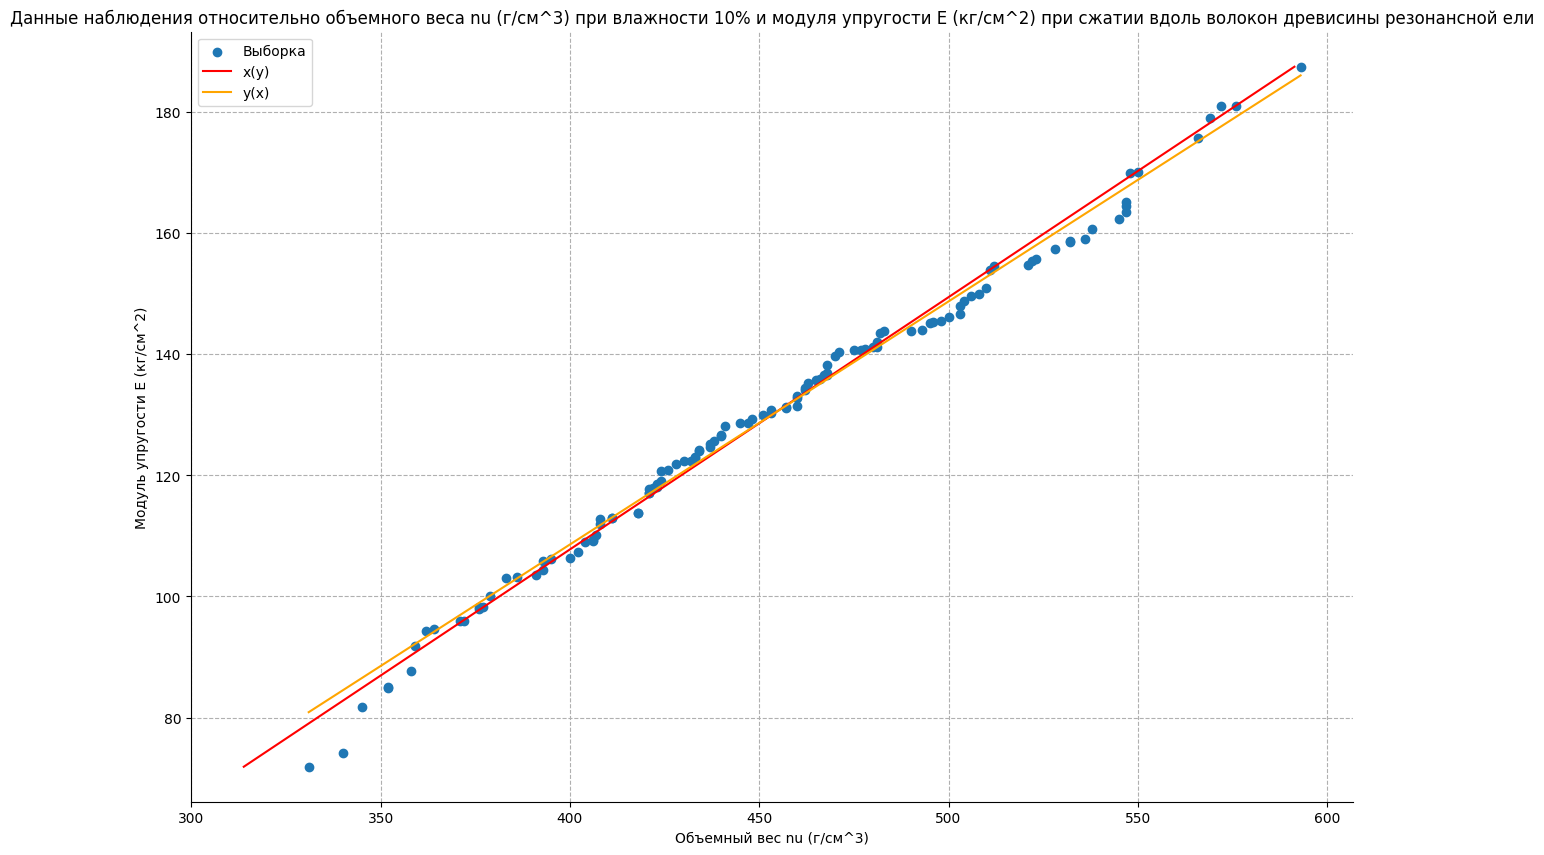

In [9]:
# Plot the figure.
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,x_E, label="Выборка")
plt.title('Данные наблюдения относительно объемного веса nu (г/см^3) при влажности 10% и модуля упругости E (кг/см^2) при сжатии вдоль волокон древисины резонансной ели')

plt.plot(regr_xy(x_E), x_E, label = "x(y)", color="red")
plt.plot(x, regr_yx(x), label = "y(x)", color="orange")
ax.legend()

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.set_ylabel("Модуль упругости E (кг/см^2)")
ax.set_xlabel("Объемный вес nu (г/см^3)")

**Выводы:**
- наблюдается графическое подтверждение высокому коэф-ту корреляции
- точка пересечения является среднимм выборочным значения для каждой выборки

###3. Составим корреляционную таблицу для нахождения выборочного корреляционного отношения. Убедимся, что неравенства $η_{xy}⩾|r_{xy}|$ и $η_{yx}⩾|r_{xy}|$выполняются.

где $\overline{y}_x$ и $\overline{x}_y$ — групповые выборочные средние, $D_y$ и $D_x$ — групповые выборочные дисперсии

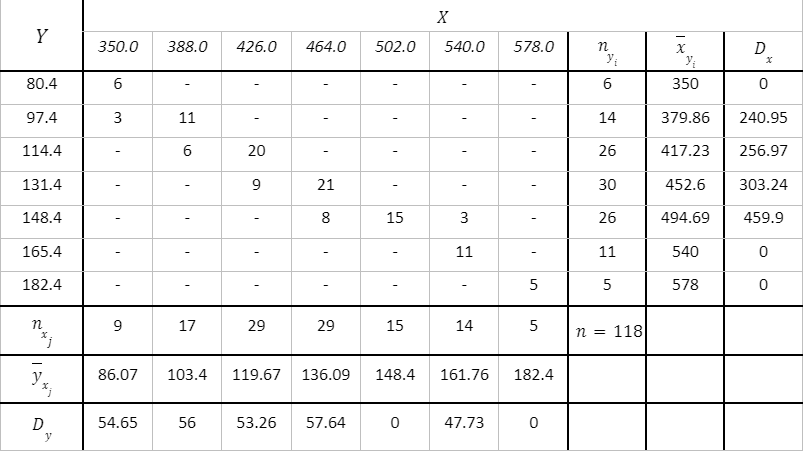

Вычислим корреляционные отношения

$D_{внгр_{x}}=\frac{1}{n}∑D_x*n_y=135.67$

$D_{межгр_{x}}=\frac{1}{n}∑(\overline{x}_{y}-\overline{x}_{В})^2*n_y=3804.62$

$D_{общ_{x}} = D_{внгр_{x}}+D_{межгр_{x}} = 3935.29$

$$\overline{η_x}=\sqrt{\frac{D_{межгр_{x}}}{D_{общ_{x}}}}=0.9832$$

$$|\overline{η_x}| ≥ \overline{r_{xy}} = 0.9816$$

$D_{внгр_{y}}=\frac{1}{n}∑D_y*n_x=29.815$

$D_{межгр_{y}}=\frac{1}{n}∑(\overline{y}_{x}-\overline{y}_{В})^2*n_x=863.52$

$D_{общ_{y}} = D_{внгр_{y}}+D_{межгр_{y}} = 893.335$

$$\overline{η_y}=\sqrt{\frac{D_{межгр_{y}}}{D_{общ_{y}}}}=0.9832$$

$$|\overline{η_y}| ≥ \overline{r_{xy}} = 0.9816$$

### 4. Для заданной выборки построим корреляционную кривую параболического вида $y=\beta_0 + \beta_1 x+ \beta_2 x^2 $

Значения коэффициентов $β_0 = c, β_1 = b, β_2 = a$ определяются с помощью МНК

$\left\{\begin{matrix} \left ( \sum_{i=1}^{m} n_{x_i}x_i^4 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i^3 \right )  b + \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  c = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} x_i^2\\ \left ( \sum_{i=1}^{m} n_{x_i}x_i^3 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  b + \left ( \sum_{i=1}^{m} n_{x_i}x_i \right )  c = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} x_i\\ \left ( \sum_{i=1}^{m} n_{x_i}x_i^2 \right )  a +  \left ( \sum_{i=1}^{m} n_{x_i}x_i \right )  b + Nc = \sum_{i=1}^{m}  n_{x_i} \overline{y_{x_i}} \end{matrix}\right.$

In [22]:
N = 118

s_n_x4 = 0
s_n_x3 = 0
s_n_x2 = 0
s_n_x1 = 0
s_y_x2 = 0
s_y_x1 = 0
s_y = 0
for i in range(N):
  s_n_x4 += x[i] ** 4
  s_n_x3 += x[i] ** 3
  s_n_x2 += x[i] ** 2
  s_n_x1 += x[i] ** 1

  s_y_x2 += x[i] ** 2 * x_E[i]
  s_y_x1 += x[i] ** 1 * x_E[i]
  s_y    += x_E[i]


print(s_n_x4, 'a+', s_n_x3, 'b+', s_n_x2, 'c' '=', s_y_x2, sep='')
print(s_n_x3, 'a+', s_n_x2, 'b+', s_n_x1, 'c' '=', s_y_x1, sep='')
print(s_n_x2, 'a+', s_n_x1, 'b+', N, 'c' '=', s_y, sep='')

5498368118357a+11553799319b+24660197c=3348529777.6999993
11553799319a+24660197b+53495c=7100959.9
24660197a+53495b+118c=15297.0


In [23]:
lpart = np.array([[5498368118357, 11553799319, 24660197],
 [11553799319, 24660197, 534953],
  [24660197, 53495, 118]])

rpart = np.array([3348529777.6999993, 7100959.9, 15297.0])

a,b,c = np.linalg.inv(lpart).dot(rpart)

print("a = " + str(a))
print("b = " + str(b))
print("c = " + str(c))

a = 0.0002594587287267662
b = 0.166341309099181
c = 0.0022737793869145014


In [24]:
x_list = x.to_list()
y_list = x_E.to_list()
x_list.sort()

x_parb = [i for i in range(x_list[0], x_list[len(x_list)-1])]
y_parab = [a*x**2 + b*x + c for x in x_parb]

Text(0.5, 0, 'Объемный вес nu (г/см^3)')

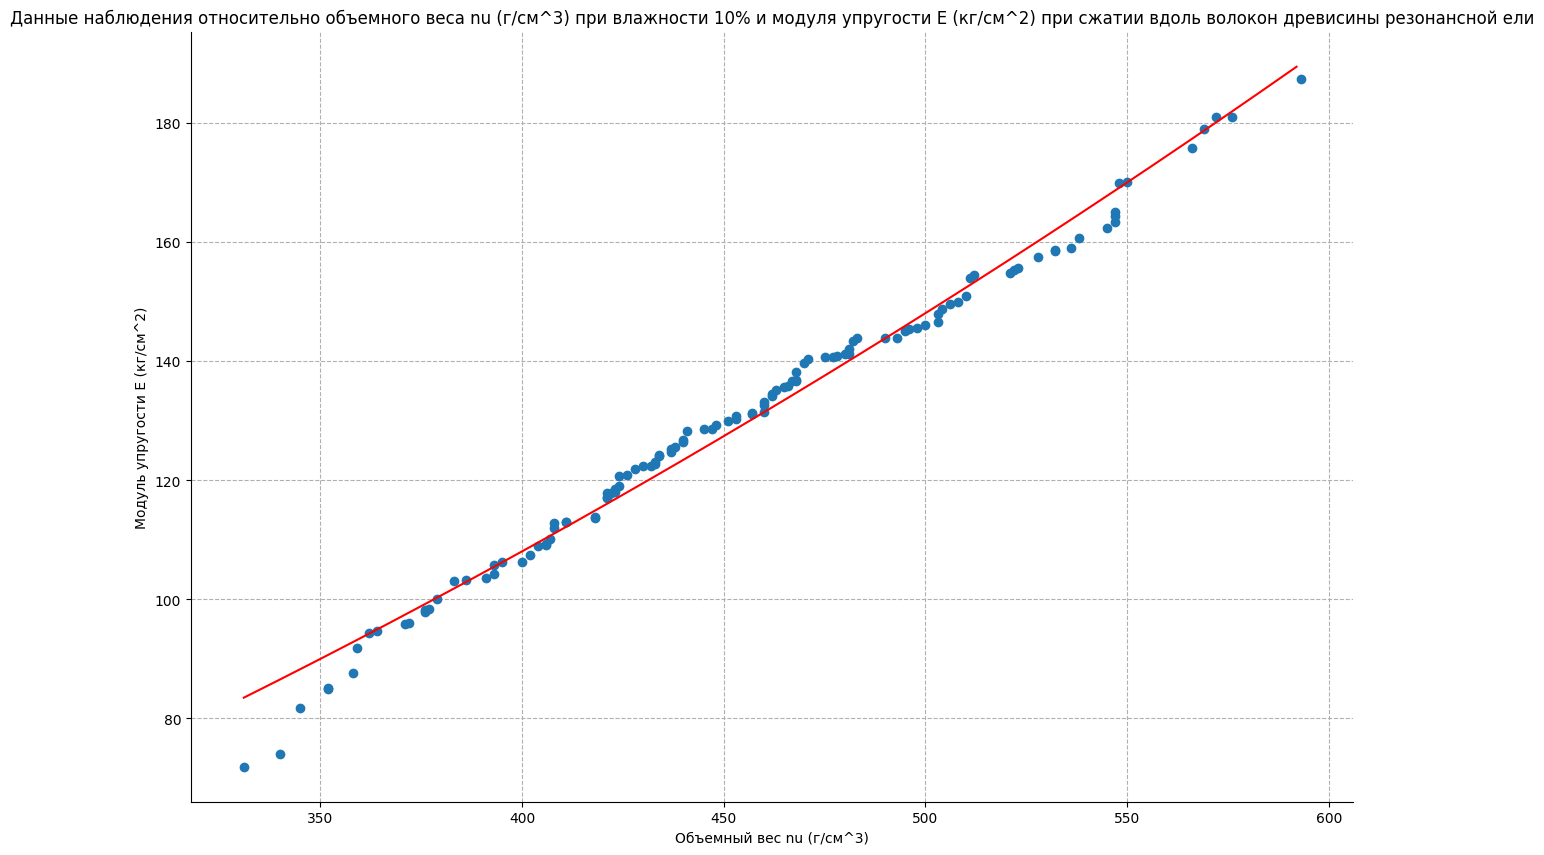

In [25]:
# Plot the figure.
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,x_E)
plt.title('Данные наблюдения относительно объемного веса nu (г/см^3) при влажности 10% и модуля упругости E (кг/см^2) при сжатии вдоль волокон древисины резонансной ели')

plt.plot(x_parb, y_parab, label = "y(x) параболическая", color="red") # параболическая функция

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.set_ylabel("Модуль упругости E (кг/см^2)")
ax.set_xlabel("Объемный вес nu (г/см^3)")

**Выводы:** параболическая кривая довольно точно описывает данные, однако линейная регрессия показала более качественный результат

### 5. Для заданной выборки построиv корреляционную кривую показательной функции: $y = \beta_0 exp(\beta_1x)$ (вариант 8)

Значения коэффициентов  $β_0=a,β_1=b$  определяются с помощью МНК

\begin{equation}
\left\{ \begin{aligned}
  a∑x_i^2+B∑x_i=∑x_ilny_i\\
  a\sum{x_i}+Bn=∑lny_i
\end{aligned} \right.
\end{equation}

где $b = e^B$

In [35]:
N = 118

s_n_x2 = 0
s_n_x1 = 0
s_x_y = 0
s_y = 0
for i in range(N):
  s_n_x2 += x[i] ** 2
  s_n_x1 += x[i]

  s_x_y += x[i] * np.log(x_E[i])
  s_y += np.log(x_E[i])


print(s_n_x2, 'a+', s_n_x1, 'B=', s_x_y, sep='')
print(s_n_x1, 'a+', N, 'B=', s_y, sep='')

24660197a+53495B=260588.1878237249
53495a+118B=571.9074921674776


In [36]:
lpart = np.array([[24660197, 53495],
 [53495, 118]])

rpart = np.array([260588.1878237249, 571.9074921674776])

a,B = np.linalg.inv(lpart).dot(rpart)
b = np.log(B)

print("a = " + str(a))
print("b = " + str(b))

a = 0.003221012655775921
b = 1.2197779712234678


In [37]:
x_pokaz = [i for i in range(x_list[0], x_list[len(x)-1])]
y_pokaz = [a * np.exp(b*x) for x in x_pokaz]

<ipython-input-37-7336303efb0a>:2: RuntimeWarning: overflow encountered in exp
  y_pokaz = [a * np.exp(b*x) for x in x_pokaz]


Text(0.5, 0, 'Объемный вес nu (г/см^3)')

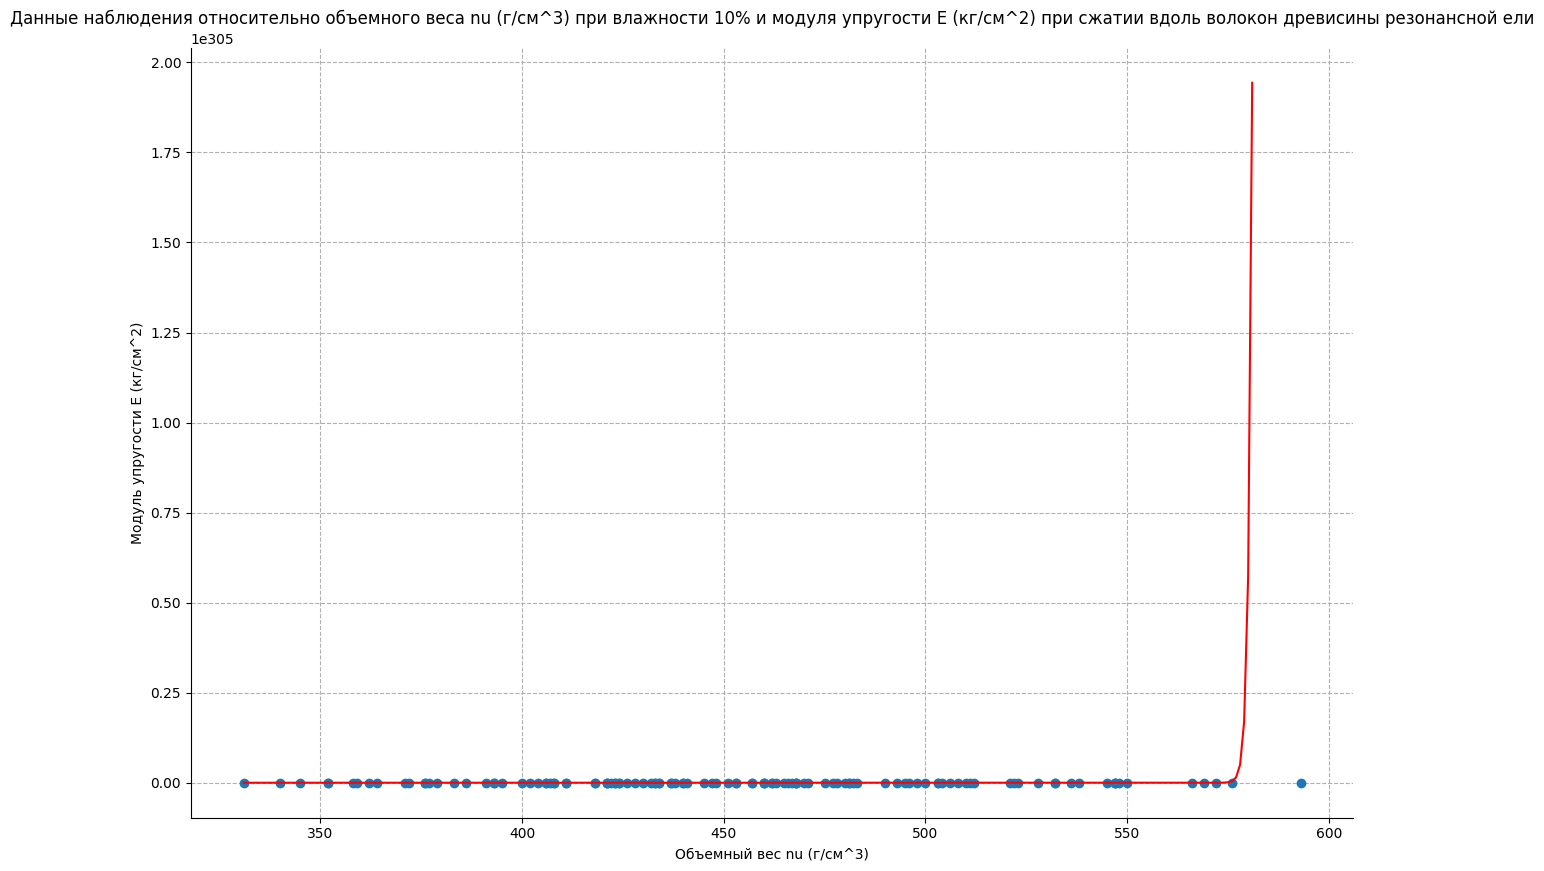

In [38]:
# Plot the figure.
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,x_E)
plt.title('Данные наблюдения относительно объемного веса nu (г/см^3) при влажности 10% и модуля упругости E (кг/см^2) при сжатии вдоль волокон древисины резонансной ели')

plt.plot(x_pokaz, y_pokaz, label = "y(x) показательная", color="red") # показательная функция

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.set_ylabel("Модуль упругости E (кг/см^2)")
ax.set_xlabel("Объемный вес nu (г/см^3)")

**Выводы:**
- экспоненциальная аппроксимация данных является избыточной в данном случае
- можно было заметить, что с обобщением данных хорошо справилась линейная функция

## Выводы

В ходе выполнения данной лабораторной работы было произведено ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи. Графически проанализированы обе выборки, что дало убедиться в сильной связи выборок. Составлена корреляционная таблица, найдены корреляционные отношения, которые оказались выше коэффициента корреляции, как и предполагалось. Также построены различные уравнения регрессии и можно сделать вывод, что наилучшим образом данные описываются уравнением средней квадртичной регрессии.